In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from useful_tools import ModelTester

In [2]:
with open('../datasets/housesaleprediction/kc_house_data.csv') as infile:
    data = pd.read_csv(infile)
    
data.drop(['id', 'date', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15'], axis=1, inplace=True)

X = data.drop(['price'], axis=1)
Y = data['price']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

tester = ModelTester(x_test, y_test)

In [3]:
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987


# En variabel

In [4]:
variables = ['sqft_living']

model_one = LinearRegression()
model_one.fit(x_train[variables], y_train)

tester.test_regressor(model_one, variables)

MSE:  70673655952.8


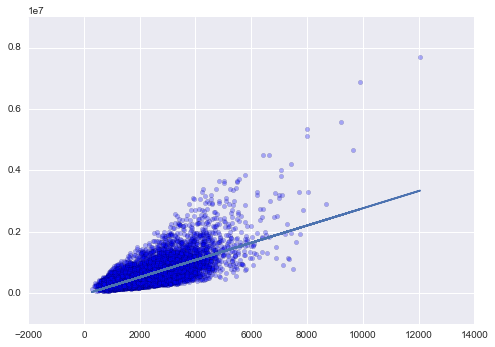

In [5]:
plt.scatter(x_train[variables], y_train, alpha=0.3)
plt.plot(x_train[variables], model_one.predict(x_train[variables]))
plt.show()

# Flere variable

In [8]:
variables = x_train.columns.values

model_all = LinearRegression()
model_all.fit(x_train[variables], y_train)

tester.test_regressor(model_all, variables)

MSE:  46373241415.7
